In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['l1', 'l2', 'l3', 'l4', 'type']
df = pd.read_csv(url, names=names)
df.head()

,l1,l2,l3,l4,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()

,l1,l2,l3,l4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
l1      150 non-null float64
l2      150 non-null float64
l3      150 non-null float64
l4      150 non-null float64
type    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

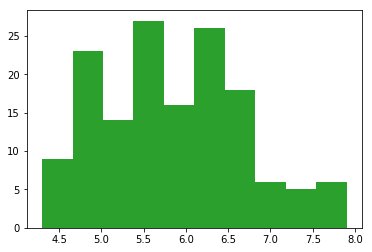

In [23]:
plt.hist(df['l1'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

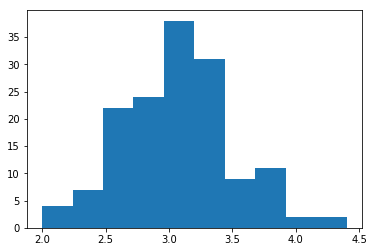

In [24]:
plt.hist(df['l2'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

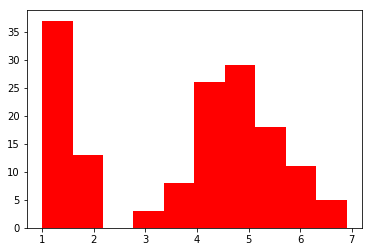

In [26]:
plt.hist(df['l3'],color='red')

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

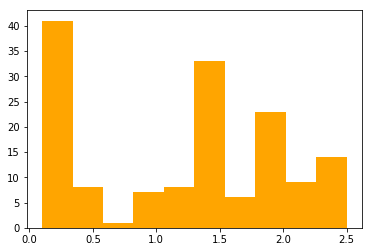

In [27]:
plt.hist(df['l4'],color='orange')

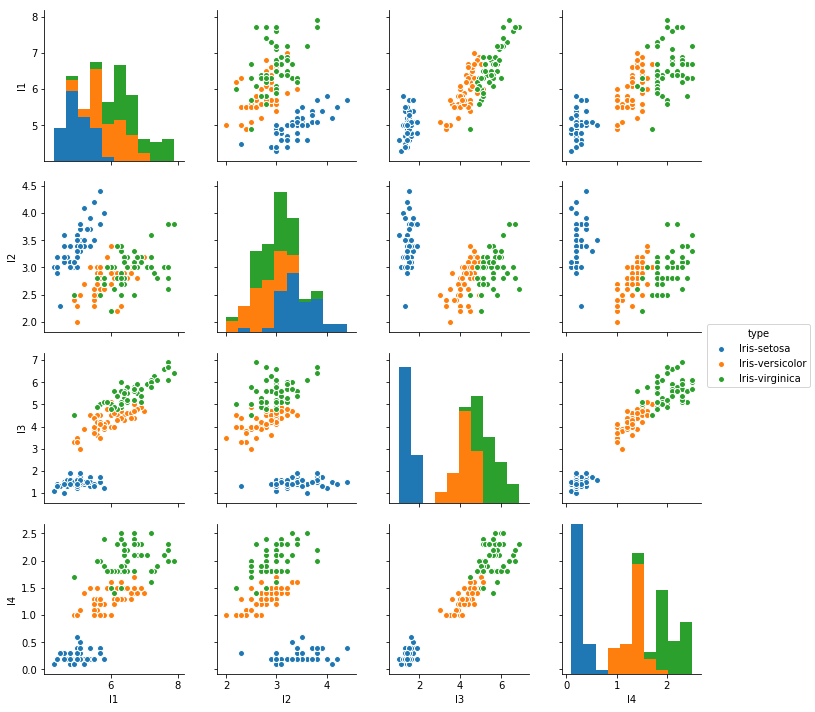

In [33]:
sns.pairplot(df, hue='type')


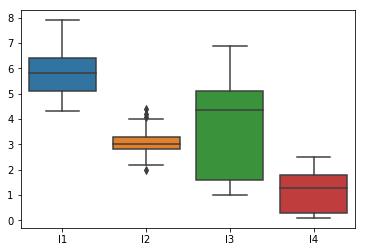

In [52]:
sns.boxplot(data=df)

In [34]:
from sklearn.model_selection import train_test_split

In [53]:
X=df.drop('type',axis=1)
y=df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions=lr.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

    avg / total       0.97      0.97      0.97        30



In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [61]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

c:\users\500044649\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [62]:
prediction=lda.predict(X_test)

In [63]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30



In [ ]:
#We can see that LDA works better than Logistic Regression